In [32]:
import numpy as np
# Erzeuge einen Superpositionszustand (α|0⟩ + β|1⟩)
alpha, beta = 1/np.sqrt(2), 1/np.sqrt(2)  # Gleichverteilung
qubit = np.array([alpha, beta])
print("Qubit-Vektor:", qubit)

Qubit-Vektor: [0.70710678 0.70710678]


In [33]:
import pandas as pd
# Beispiel-Lieferroute (Städte, Distanzen)
df = pd.DataFrame({"Stadt": ["Berlin", "München"], "Distanz_km": [300, 600]})
print(df)

     Stadt  Distanz_km
0   Berlin         300
1  München         600


In [34]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

# Quantenschaltkreis erstellen
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])  # Explizite Messung

# Simulation mit der modernen Aer-API
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1024)  # Direkte Verwendung des Backends
result = job.result()
counts = result.get_counts()

print("Schaltkreis:")
print(qc.draw())
print("\nMessergebnisse:", counts)

Schaltkreis:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Messergebnisse: {'00': 512, '11': 512}


In [35]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer  # Sollte jetzt funktionieren

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
print(qc.draw())

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


Ergebnis: {'11': 1533, '00': 1467}


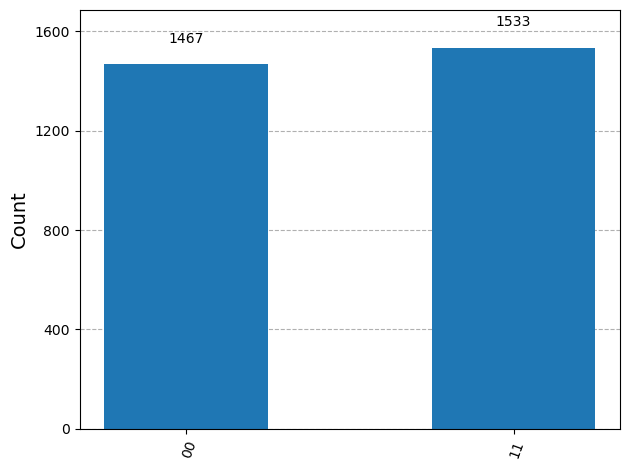

In [28]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Achtung: "aer" statt "Aer"!

# 1. Quantenschaltkreis erstellen
qc = QuantumCircuit(2)
qc.h(0)          # Hadamard-Gatter (Superposition)
qc.cx(0, 1)      # CNOT (Verschränkung)
qc.measure_all() # Messung

# 2. Simulation mit AerSimulator
simulator = AerSimulator()  # Neu: Direkte Instanzierung
job = simulator.run(qc, shots=3000)  # Modernes Interface
result = job.result()
counts = result.get_counts()

# 3. Ergebnis plotten
print("Ergebnis:", counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [29]:
import qiskit
print(qiskit.__version__)  # Sollte >= 0.39.0 sein

2.0.2


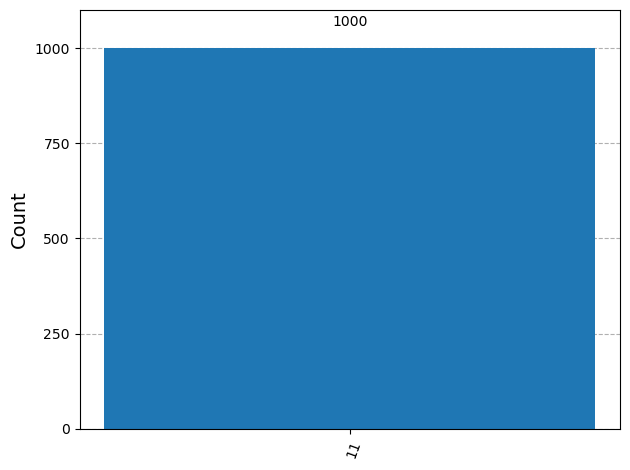

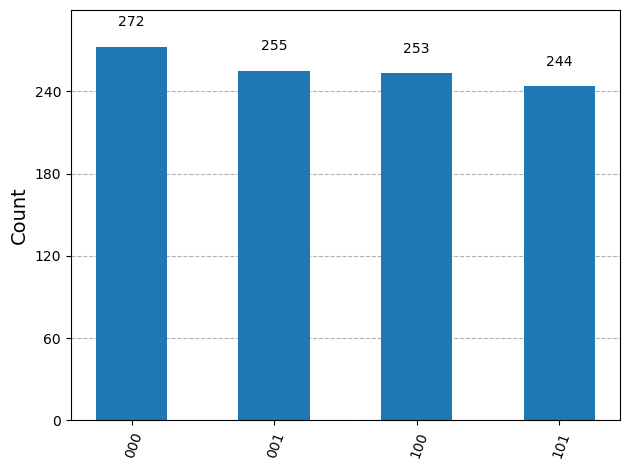

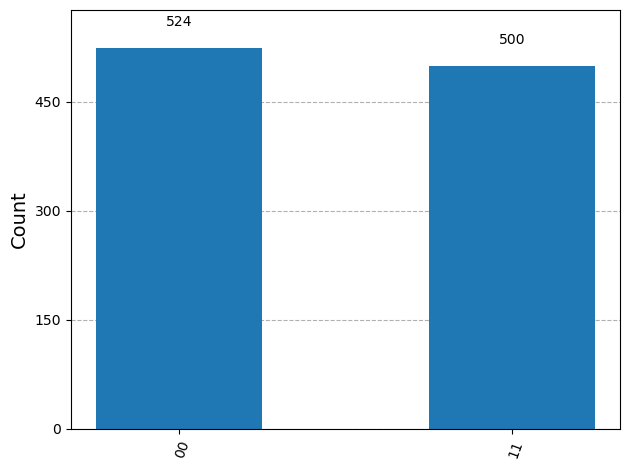

{'00': 524, '11': 500}


In [184]:
"""Erzeugung eines Bell-Zustandes"""

%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.show()

print(counts)


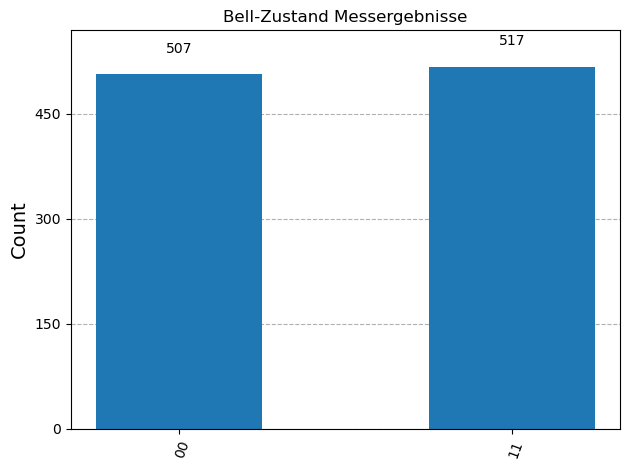

In [185]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Schaltkreis erstellen
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Simulator definieren und ausführen
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Visualisierung
plot_histogram(counts, title="Bell-Zustand Messergebnisse")
plt.show()


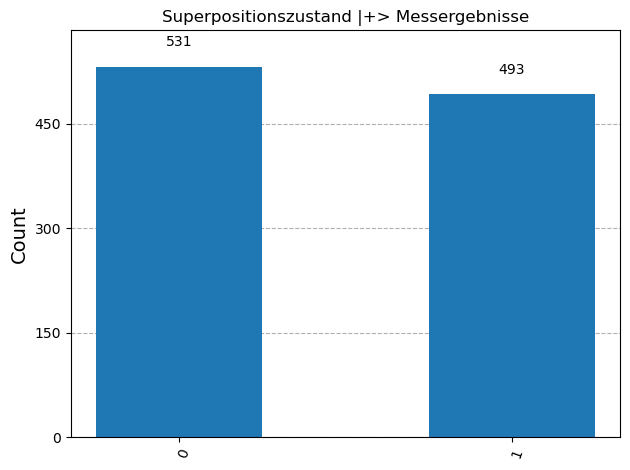

In [186]:
# Erzeuge und untersuche einen Superpositionszustand
#Aufgabenstellung:
#Erstelle einen Quanten-Schaltkreis mit einem Qubit, bringe es in eine Superposition, führe eine Messung durch und visualisiere die Messergebnisse. Analysiere anschließend das Ergebnis.

#Schritt-für-Schritt-Anleitung:

#Schaltkreis erstellen:

#Ein Qubit, ein klassisches Bit.

#Hadamard-Gatter auf das Qubit anwenden.

#Messung hinzufügen:

#Das Qubit messen und das Ergebnis im klassischen Bit speichern.

#Simulation und Visualisierung:

#Mit dem AerSimulator ausführen.

#Die Messergebnisse als Histogramm darstellen.

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. Schaltkreis mit 1 Qubit und 1 klassischem Bit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Hadamard-Gatter erzeugt Superposition
qc.measure(0, 0)  # Messung

# 2. Simulation
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)  # 1024 Schüsse für statistische Verteilung
result = job.result()
counts = result.get_counts()

# 3. Visualisierung
plot_histogram(counts, title="Superpositionszustand |+> Messergebnisse")
plt.show()


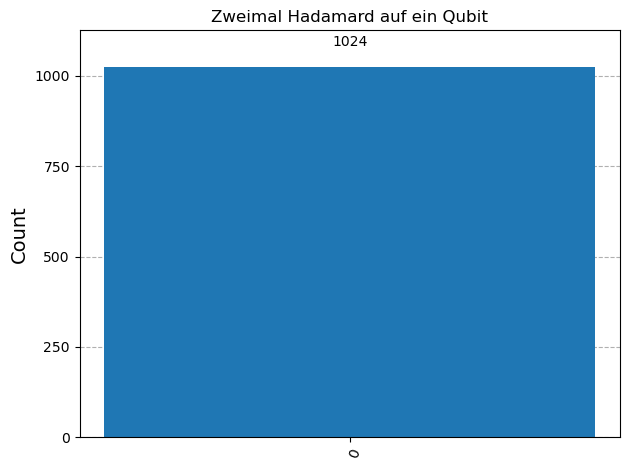

In [187]:
# Messung mit zweitem Hadamard-Gatter
# Aufgabenerweiterung:

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(1, 1)
qc.h(0)       # Erstes Hadamard: Superposition
qc.h(0)       # Zweites Hadamard: Rückkehr zum Anfangszustand
qc.measure(0, 0)

simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts, title="Zweimal Hadamard auf ein Qubit")
plt.show()


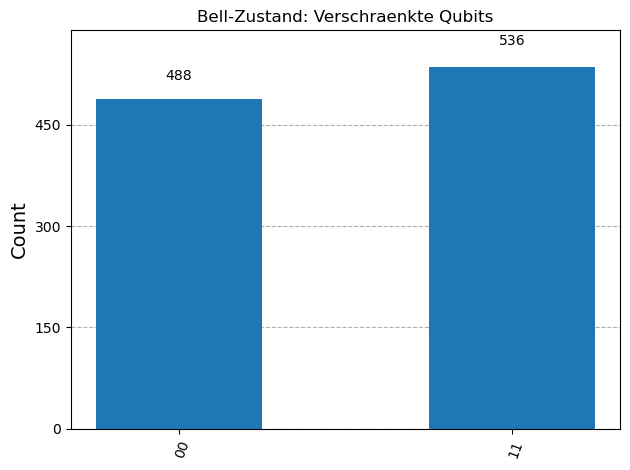

In [188]:
"""Neue Qiskit-Aufgabe: Erzeuge einen verschränkten Zustand und überprüfe die Korrelation
Aufgabenstellung:
Erstelle einen Quanten-Schaltkreis mit zwei Qubits, bringe sie in einen verschränkten Zustand (Bell-Zustand), führe Messungen durch und analysiere die Korrelation der Messergebnisse.

Schritt-für-Schritt-Anleitung:

Schaltkreis erstellen:

Zwei Qubits, zwei klassische Bits.

Hadamard-Gatter auf Qubit 0.

CNOT-Gatter (Qubit 0 steuert Qubit 1).

Messung:

Beide Qubits messen und die Ergebnisse in die klassischen Bits schreiben.

Simulation und Visualisierung:

Mit AerSimulator ausführen.

Messergebnisse als Histogramm darstellen. """

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. Schaltkreis mit 2 Qubits und 2 klassischen Bits
qc = QuantumCircuit(2, 2)
qc.h(0)        # Hadamard-Gatter auf Qubit 0
qc.cx(0, 1)    # CNOT-Gatter (Qubit 0 steuert Qubit 1)
qc.measure([0, 1], [0, 1])  # Beide Qubits messen

# 2. Simulation
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# 3. Visualisierung
plot_histogram(counts, title="Bell-Zustand: Verschraenkte Qubits")
plt.show()


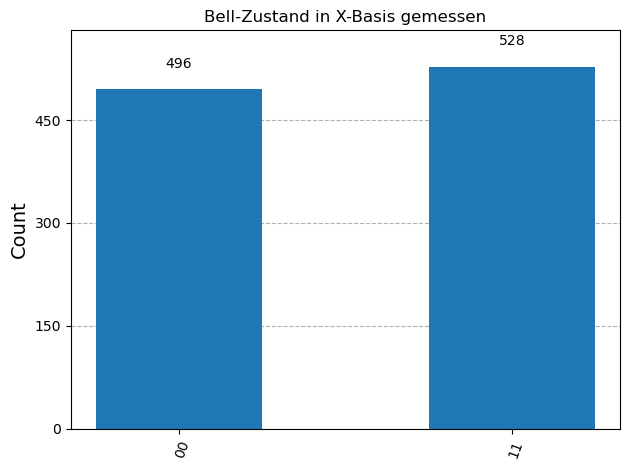

In [189]:
"""Erweitere den Bell-Zustand-Schaltkreis, um die Qubits in der X-Basis (Superpositionsbasis) statt der Standard-Z-Basis zu messen. Analysiere, wie sich die Korrelation der Ergebnisse ändert.

1. Theoretischer Hintergrund
X-Basis-Messung:
Um in der X-Basis zu messen, wird vor der Messung ein Hadamard-Gatter auf das jeweilige Qubit angewendet. """
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Hadamard-Gatter vor der Messung für X-Basis-Messung
qc.h([0, 1])  # Wichtig: Nur für X-Basis-Messung!
qc.measure([0, 1], [0, 1])

simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts, title="Bell-Zustand in X-Basis gemessen")
plt.show()


In [190]:
"""Deutsch-Jozsa-Algorithmus"""

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

# 1. Definition des Oracles (Balanced oder Constant)
def deutsch_jozsa_oracle(n, balanced=True):
    """Erstellt ein Oracle für den Deutsch-Jozsa-Algorithmus.
    
    Args:
        n (int): Anzahl der Eingangs-Qubits.
        balanced (bool): Wenn True, erzeugt ein balanciertes Oracle.
    
    Returns:
        QuantumCircuit: Oracle-Schaltkreis.
    """
    oracle = QuantumCircuit(n + 1)  # n Eingangs-Qubits + 1 Ausgangs-Qubit
    
    if balanced:
        # Balanciertes Oracle: XOR der Eingangsbits auf das Ausgangs-Qubit
        for qubit in range(n):
            oracle.cx(qubit, n)  # CNOT jedes Eingangs-Qubit auf das Ausgangs-Qubit
    else:
        # Konstant (z. B. f(x) = 0): Keine Operation
        pass
    
    return oracle

# 2. Deutsch-Jozsa-Algorithmus
def deutsch_jozsa_algorithm(n, oracle):
    """Implementiert den Deutsch-Jozsa-Algorithmus.
    
    Args:
        n (int): Anzahl der Eingangs-Qubits.
        oracle (QuantumCircuit): Vorbereitetes Oracle.
    
    Returns:
        QuantumCircuit: Vollständiger Algorithmus-Schaltkreis.
    """
    circuit = QuantumCircuit(n + 1, n)  # n+1 Qubits, n klassische Bits für Messung
    
    # Initialisierung: |0...0>|1>
    circuit.x(n)  # Ausgangs-Qubit auf |1> setzen
    
    # Hadamard auf alle Qubits
    for qubit in range(n + 1):
        circuit.h(qubit)
    
    # Oracle einfügen
    circuit.compose(oracle, inplace=True)
    
    # Hadamard auf die Eingangs-Qubits
    for qubit in range(n):
        circuit.h(qubit)
    
    # Messung der Eingangs-Qubits
    for qubit in range(n):
        circuit.measure(qubit, qubit)
    
    return circuit

# 3. Simulation
n = 3  # Anzahl der Eingangs-Qubits
oracle = deutsch_jozsa_oracle(n, balanced=False)  # Balanciertes Oracle
dj_circuit = deutsch_jozsa_algorithm(n, oracle)

# Simulator
simulator = AerSimulator()
transpiled_circuit = transpile(dj_circuit, simulator)
result = simulator.run(transpiled_circuit, shots=1024).result()
counts = result.get_counts()

# Ausgabe
print("Ergebnis:", counts)


Ergebnis: {'000': 1024}


{'11': 1000}


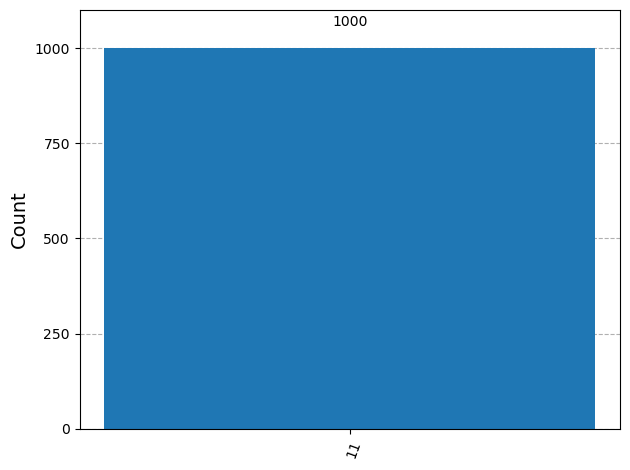

In [191]:
"""GRover Algorithmus"""
from qiskit.visualization import plot_histogram


from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

# Grover-Orakel für das Markieren von '11'
def grover_oracle(n):
    qc = QuantumCircuit(n)
    qc.cz(0, 1)  # CZ-Gatter markiert |11>
    return qc

# Diffusionsoperator (Inversion about the mean)
def diffusion_operator(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.cx(0, n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

n = 2
qc = QuantumCircuit(n, n)
qc.h(range(n))  # Superposition

# Oracle anwenden
qc.compose(grover_oracle(n), inplace=True)
# Diffusionsoperator anwenden
qc.compose(diffusion_operator(n), inplace=True)

qc.measure(range(n), range(n))

# Simulation
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
result = simulator.run(transpiled_circuit, shots=1000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


Ergebnisse: {'000': 266, '100': 234, '001': 241, '101': 283}


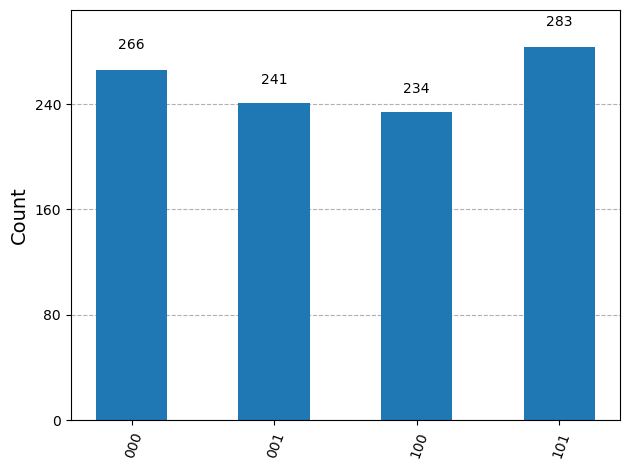

In [192]:
"""Simons Algorithmus"""
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # Wichtig: aer liegt jetzt in qiskit_aer!
from qiskit.visualization import plot_histogram
import numpy as np

def simon_oracle(s):
    n = len(s)
    qc = QuantumCircuit(2*n)
    for i in range(n):
        if s[i] == '1':
            qc.cx(i, n + i)
    return qc

def simon_algorithm(n, s):
    oracle = simon_oracle(s)
    qc = QuantumCircuit(2*n, n)
    for i in range(n):
        qc.h(i)
    qc.compose(oracle, inplace=True)
    for i in range(n):
        qc.h(i)
    qc.measure(range(n), range(n))
    return qc

n = 3
s = '101'
qc = simon_algorithm(n, s)

# Simulation mit AerSimulator (neu in Qiskit 2.0+)
simulator = AerSimulator()  # Nicht mehr Aer.get_backend()!
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()

print("Ergebnisse:", counts)
plot_histogram(counts)



In [193]:
s_list = ['110', '011', '111']  # Testen Sie verschiedene Muster
for s in s_list:
    qc = simon_algorithm(n, s)
    # ... (Simulation wie im Code oben)
    print(f"Bitmaske s = {s}: Ergebnisse = {counts}")

Bitmaske s = 110: Ergebnisse = {'000': 266, '100': 234, '001': 241, '101': 283}
Bitmaske s = 011: Ergebnisse = {'000': 266, '100': 234, '001': 241, '101': 283}
Bitmaske s = 111: Ergebnisse = {'000': 266, '100': 234, '001': 241, '101': 283}


In [194]:
from qiskit.visualization import plot_histogram
import numpy as np

# Beispiel: Gemessene Ergebnisse für s='101'
counts = {'000': 512, '101': 512}

# Extrahiere Bitstrings mit Häufigkeit > 0
measured_bits = [np.array(list(map(int, k))) for k in counts.keys()]

# Löse das lineare Gleichungssystem (hier vereinfacht)
s = np.bitwise_xor.reduce(measured_bits)  # XOR aller gemessenen Bitstrings
print(f"Gefundene Bitmaske s: {''.join(map(str, s))}")

Gefundene Bitmaske s: 101


In [195]:
import numpy as np
from itertools import product

# 1. Anzahl der Qubits und geheime Bitmaske
n = 3
s = '101'  # Die geheime Bitmaske als String

# 2. Hilfsfunktion: XOR zweier Bitstrings als Tupel
def xor_bits(a, b):
    return tuple((ai ^ bi) for ai, bi in zip(a, b))

# 3. Simon-Funktion: f(x) = f(x ⊕ s)
# Wir erzeugen eine zufällige 2-zu-1-Funktion, die die Simon-Bedingung erfüllt
def make_simon_function(s, n):
    s_tuple = tuple(int(bit) for bit in s)
    mapping = {}
    used = set()
    for x in product([0, 1], repeat=n):
        if x in used:
            continue
        x_xor_s = xor_bits(x, s_tuple)
        # Erzeuge einen zufälligen Output für das Paar (x, x⊕s)
        y = np.random.randint(0, 2**n)
        y_str = format(y, f'0{n}b')
        mapping[x] = y_str
        mapping[x_xor_s] = y_str
        used.add(x)
        used.add(x_xor_s)
    def f(x):
        return mapping[tuple(x)]
    return f

# 4. Klassischer Simon-Algorithmus
def classical_simon(f, n):
    outputs = {}
    for x in product([0, 1], repeat=n):  # Alle möglichen Eingaben
        y = f(x)
        if y in outputs:
            # s = x ⊕ x'
            s_found = xor_bits(x, outputs[y])
            return s_found
        outputs[y] = x
    return None

# 5. Funktion erzeugen und Algorithmus ausführen
f = make_simon_function(s, n)
s_classical = classical_simon(f, n)

# 6. Ausgabe mit Fehlerbehandlung
if s_classical is not None:
    print(f"Klassisch gefundene Bitmaske: {''.join(map(str, s_classical))}")
else:
    print("Keine Bitmaske gefunden. Überprüfe die Funktion f(x).")



Klassisch gefundene Bitmaske: 101
